# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import lightgbm as lgb
import catboost as cb

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [2]:
telecom_users = pd.read_csv('readonly/telecom_users.csv')
telecom_users

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [3]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [4]:
# Проверяем отсутствующие значения
telecom_users.isnull().values.any()

False

In [5]:
# Заменяю класс предсказания Yes/No на цифровой, для удобства дальнейшей работы
# telecom_users['Churn'][telecom_users['Churn']=='Yes']=1
# telecom_users['Churn'][telecom_users['Churn']=='No']=0
# telecom_users['Churn'] = telecom_users['Churn'].astype('int32')
# telecom_users

In [6]:
# Меняю тип столца на числовой, помечая пропущенные данные как '-1'
telecom_users['TotalCharges'][telecom_users['TotalCharges']==' ']=-1
telecom_users['TotalCharges'] = telecom_users['TotalCharges'].astype(np.float)

<ipython-input-6-2465ce28771f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_users['TotalCharges'][telecom_users['TotalCharges']==' ']=-1


In [7]:
# Переименовываю столбец, для удобства дальнейшей работы с ним
telecom_users.rename(columns={'Unnamed: 0': 'Unnamed_0'}, inplace=True) # = 'Unnamed_0'

In [8]:
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed_0         5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [9]:
telecom_users

,Unnamed_0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [10]:
telecom_users.describe()

,Unnamed_0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2294.219888
std,2035.705666,0.367909,24.516391,30.114702,2274.165810
min,0.000000,0.000000,0.000000,18.250000,-1.000000
25%,1777.250000,0.000000,9.000000,35.650000,401.587500
50%,3546.500000,0.000000,29.000000,70.400000,1408.575000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [11]:
full_client_number = telecom_users.shape[0]
print('Количество клиентов:', full_client_number)
print('Количество уникальных клиентов:', telecom_users['customerID'].unique().shape[0])

Количество клиентов: 5986
Количество уникальных клиентов: 5986


Среди клиентов 3050 мужчин и 2936 женщин


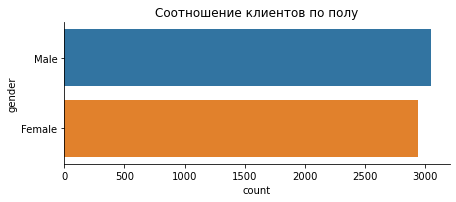

In [12]:
print('Среди клиентов', telecom_users[telecom_users['gender']=='Male'].shape[0], 
      'мужчин и',  telecom_users[telecom_users['gender']=='Female'].shape[0], 'женщин')
ax = sns.catplot(y='gender', kind='count', data=telecom_users, height=2.5 ,aspect=2.5);
ax.set(title='Соотношение клиентов по полу');

In [13]:
number_of_seniors = telecom_users[telecom_users['SeniorCitizen']==1].shape[0]
print('Общая доля пожилых людей: ', 
      round(number_of_seniors/full_client_number*100, 2),
      '%', sep='', )
print('Из них не продлили контракт: ', 
      round(telecom_users[(telecom_users['SeniorCitizen']==1)&(telecom_users['Churn']==1)].shape[0]/number_of_seniors*100, 2),
      '%', sep='', )

Общая доля пожилых людей: 16.14%
Из них не продлили контракт: 0.0%


Не продлило договор всего клиентов в датасете: 1587, или 26.51%


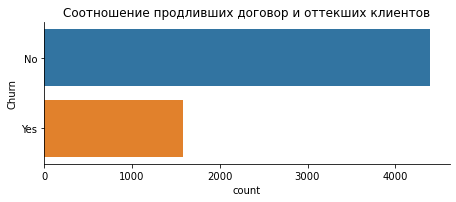

In [14]:
print('Не продлило договор всего клиентов в датасете:', 
      f"{telecom_users[telecom_users['Churn']=='Yes'].shape[0]}, или",
      f"{telecom_users[telecom_users['Churn']=='Yes'].shape[0]/full_client_number*100:.2f}%")
ax = sns.catplot(y='Churn', kind='count', data=telecom_users, height=2.5, aspect=2.5);
ax.set(title='Соотношение продливших договор и оттекших клиентов');

In [15]:
linear_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Unnamed_0']

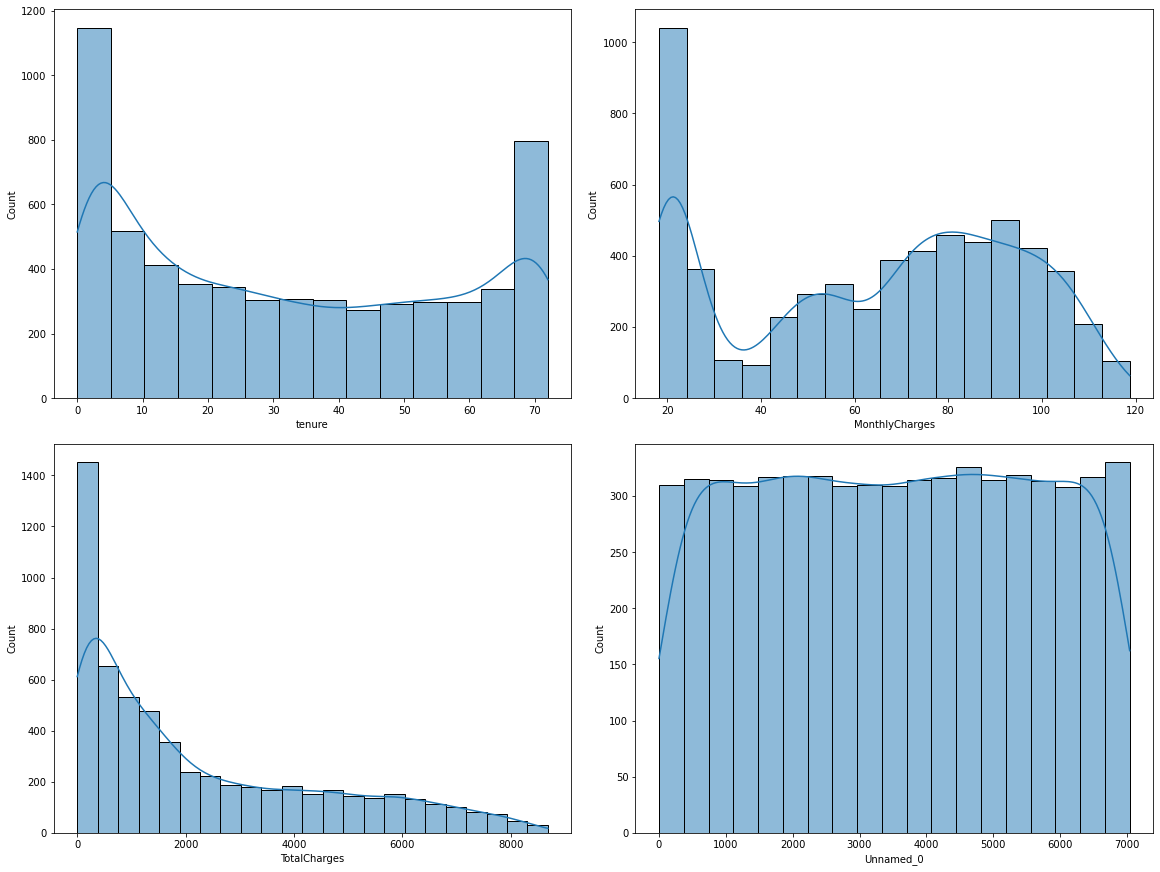

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
for i, column in enumerate(linear_columns):
    sns.histplot(x=telecom_users[column], ax=ax[i//2, i%2], kde=True)
    #sns.distplot(x=telecom_users[column], ax=ax[i//2, i%2], kde=True)

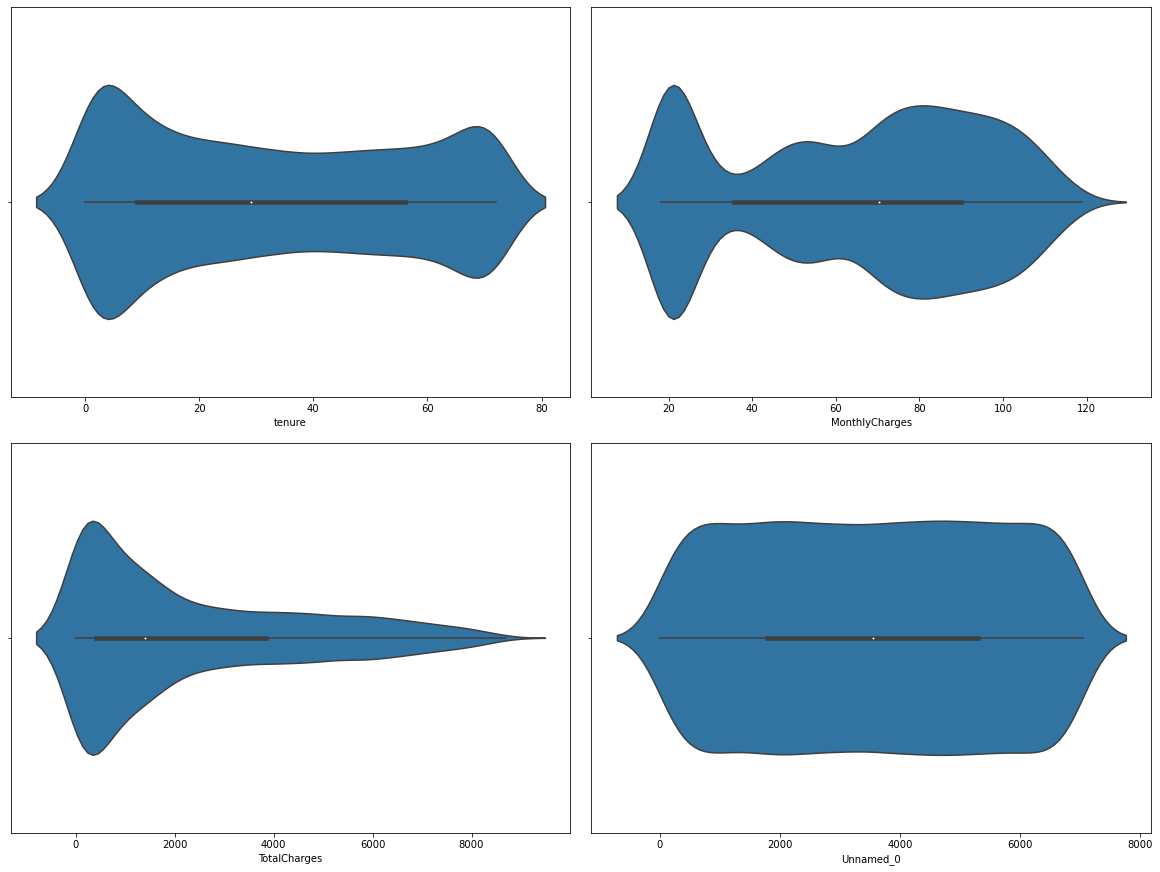

In [17]:
# Смотрим, есть ли выбросы
fig, ax = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)
for i, column in enumerate(linear_columns):
    sns.violinplot(data=telecom_users, x=column, ax=ax[i//2, i%2], width=0.6)

Явных выбросов данных не видно

In [18]:
# telecom_users[linear_columns]

In [19]:
# sns.catplot(data=telecom_users[linear_columns], kind='box', orient='v', aspect=2)

In [20]:
# Построим матрицу корреляций
telecom_users.corr()

,Unnamed_0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Unnamed_0,1.000000,-0.000331,0.009620,-0.009830,0.004213
SeniorCitizen,-0.000331,1.000000,0.005468,0.219387,0.093807
tenure,0.009620,0.005468,1.000000,0.256983,0.827756
MonthlyCharges,-0.009830,0.219387,0.256983,1.000000,0.656762
TotalCharges,0.004213,0.093807,0.827756,0.656762,1.000000


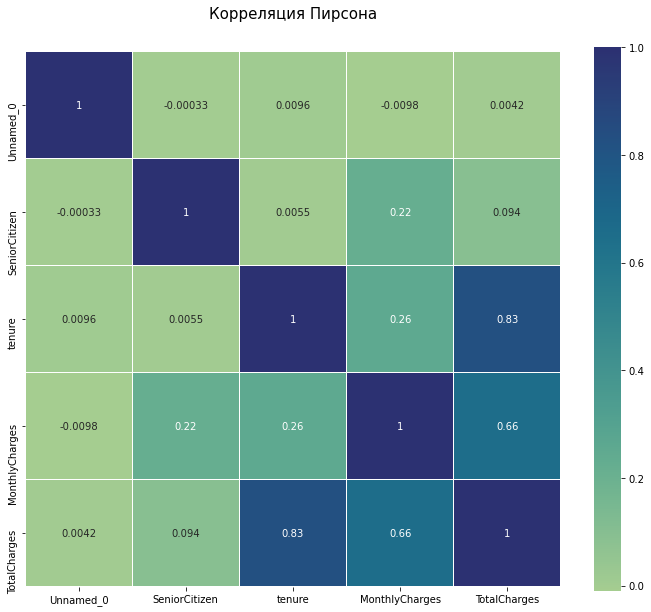

In [21]:
# Визуализируем полученную таблицу
colormap = "crest"
plt.figure(figsize=(12,10))
plt.title('Корреляция Пирсона', y=1.05, size=15)
sns.heatmap(telecom_users.corr(), annot=True, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white');

По матрице корреляций видно, что есть сильная корелляция межды длительностью договора и суммарной оплатой. Несколько меньшая связь между длительностью договора и ежемесячными платежами.

In [22]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 2. Исследование зависимостей и формулирование гипотез

In [23]:
### YOUR CODE HERE ###

По матрице корреляции не видно, отличаются ли стат. данные по оттекшим/оставшимся клиентам. Здесь нам поможет seaborn. Построим попарные соотношения по фичам, с дополнительным разделением по оттоку.

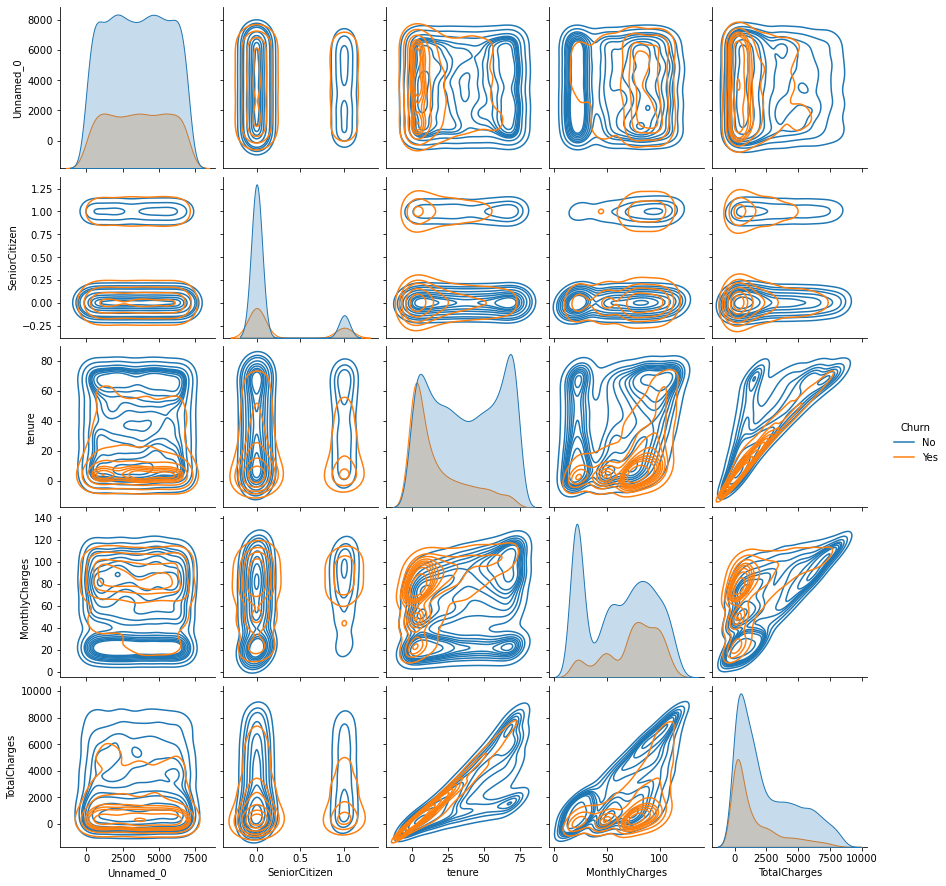

In [24]:
sns.pairplot(telecom_users, hue='Churn', 
             kind='kde', diag_kind='kde', 
             plot_kws={'fill':False},
);

Явно просматриваются кластеры ушедшех/оставшихся клиентов по разным парам значений. Видно, что данные разделимы

Заглянем в данные глубже

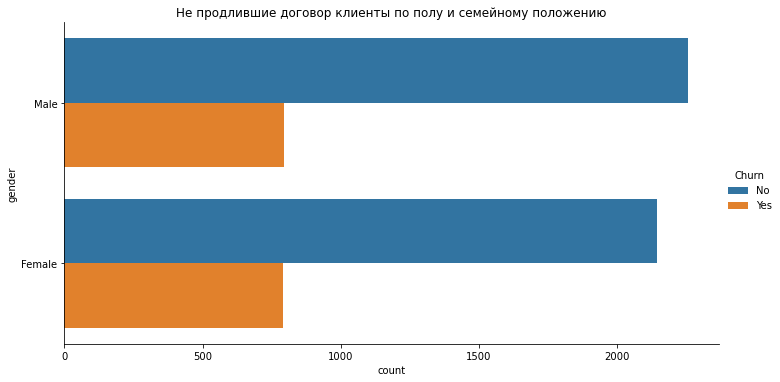

In [25]:
ax = sns.catplot(y='gender', kind='count', hue='Churn', data=telecom_users, aspect=2, height=5)
ax.set(title='Не продлившие договор клиенты по полу и семейному положению');

Семейной положение влияет на отток незначительно

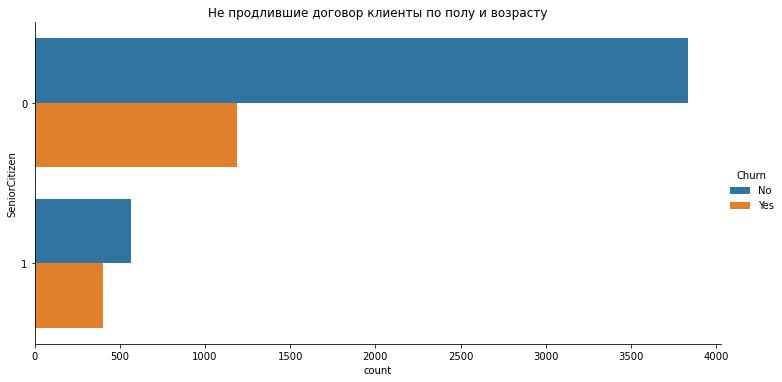

In [26]:
ax = sns.catplot(y='SeniorCitizen', hue='Churn', kind='count', data=telecom_users, aspect=2, height=5)
ax.set(title='Не продлившие договор клиенты по полу и возрасту');

Как можно видеть, на продление договора корреляции с полом практически нет, но явная связь с возрастом

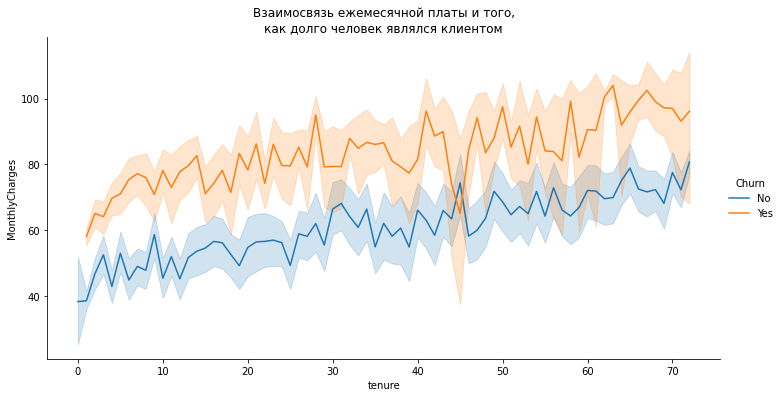

In [27]:
sns.relplot(data=telecom_users, x='tenure', y='MonthlyCharges', hue='Churn', kind='line', aspect=2, height=5)
plt.title('Взаимосвязь ежемесячной платы и того,\nкак долго человек являлся клиентом');

Можно сделать вывод, что оттекшие пользователи, в среднем, больше платили за услуги

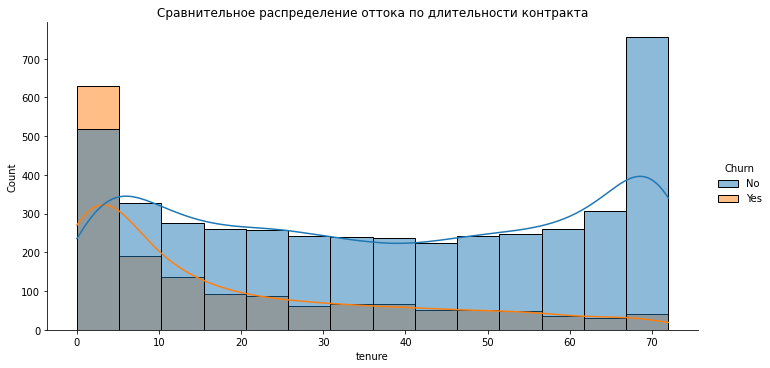

In [28]:
# plt.figure(figsize=(10, 4))
# plt.title('Сравнительное распределение оттока по длительности контракта')
# sns.histplot(x=telecom_users['tenure'], hue=telecom_users['Churn'], kde=True)
sns.displot(data=telecom_users, x='tenure', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по длительности контракта');

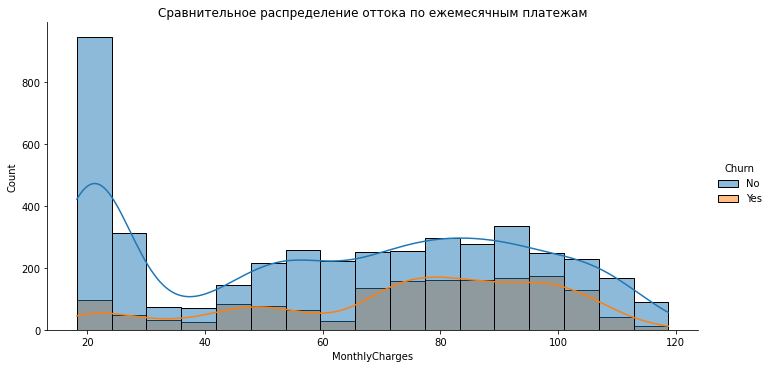

In [29]:
sns.displot(data=telecom_users, x='MonthlyCharges', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по ежемесячным платежам');

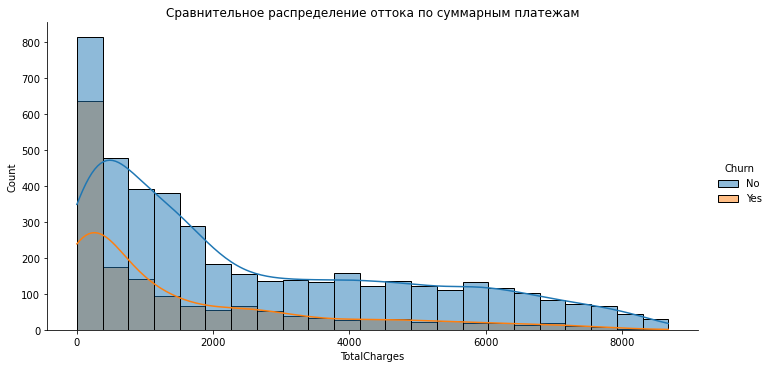

In [30]:
sns.displot(data=telecom_users, x='TotalCharges', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по суммарным платежам');

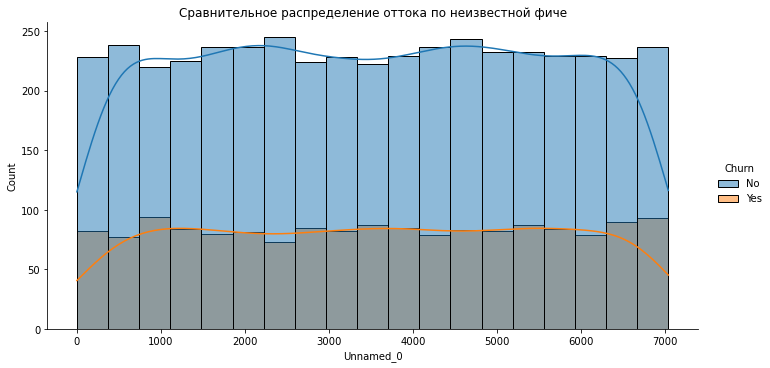

In [31]:
sns.displot(data=telecom_users, x='Unnamed_0', hue='Churn', kde=True, height=5, aspect=2)
plt.title('Сравнительное распределение оттока по неизвестной фиче');

Фича выглядит равномерно распределенной. По данным из других источников это индекс. Дальнейшие эксперименты показали, что ее наличие мало влияет на результаты обучения алгоритмов. Значит, выбрасываю ее.

In [32]:
# Удаляю фичу Unnamed_0 из датасета
telecom_users.drop(columns=['Unnamed_0'], axis=1, inplace=True)

In [33]:
# g = sns.FacetGrid(data=telecom_users, row='Partner', col='SeniorCitizen')
# g.map_dataframe(sns.catplot, 'Churn', kind='count')

Распределения ежемесячной платы и оттока от возраста и семейного положения


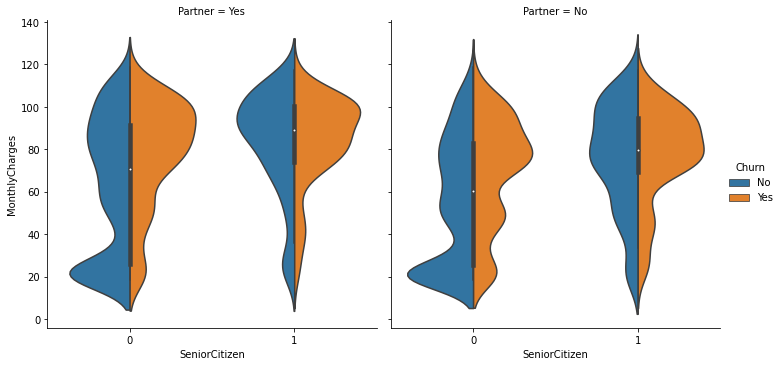

In [34]:
sns.catplot(data=telecom_users, 
            y='MonthlyCharges', x='SeniorCitizen', hue='Churn', col='Partner', 
            kind='violin', split=True, orient='v', height=5, aspect=1, legend_out=True);
print('Распределения ежемесячной платы и оттока от возраста и семейного положения');

По графикам видно, что распределение ежемесячной платы и оттока клиентов у пенсионеров/не пенсионеров существенно отличается, и несколько зависит от того, состоит ли клиент в браке

Распределения ежемесячной платы и оттока от пола и наличия детей


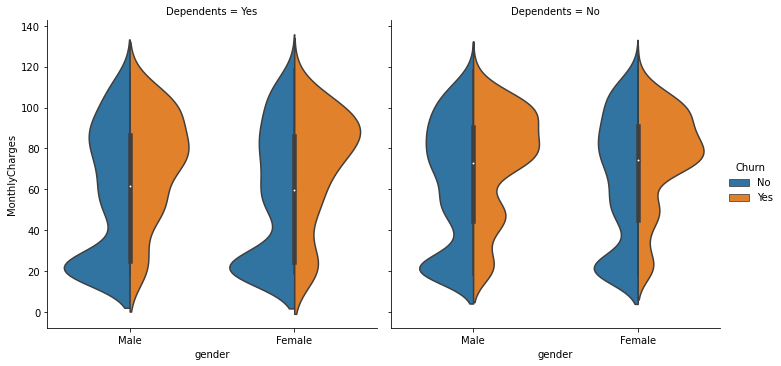

In [35]:
sns.catplot(data=telecom_users, 
            y='MonthlyCharges', x='gender', hue='Churn', col='Dependents', 
            kind='violin', split=True, orient='v', height=5, aspect=1);
print('Распределения ежемесячной платы и оттока от пола и наличия детей');

По графикам видно, что ушедшие клиенты платят, в среднем, больше. И отток от пола/наличия иждивенцев зависит слабо.

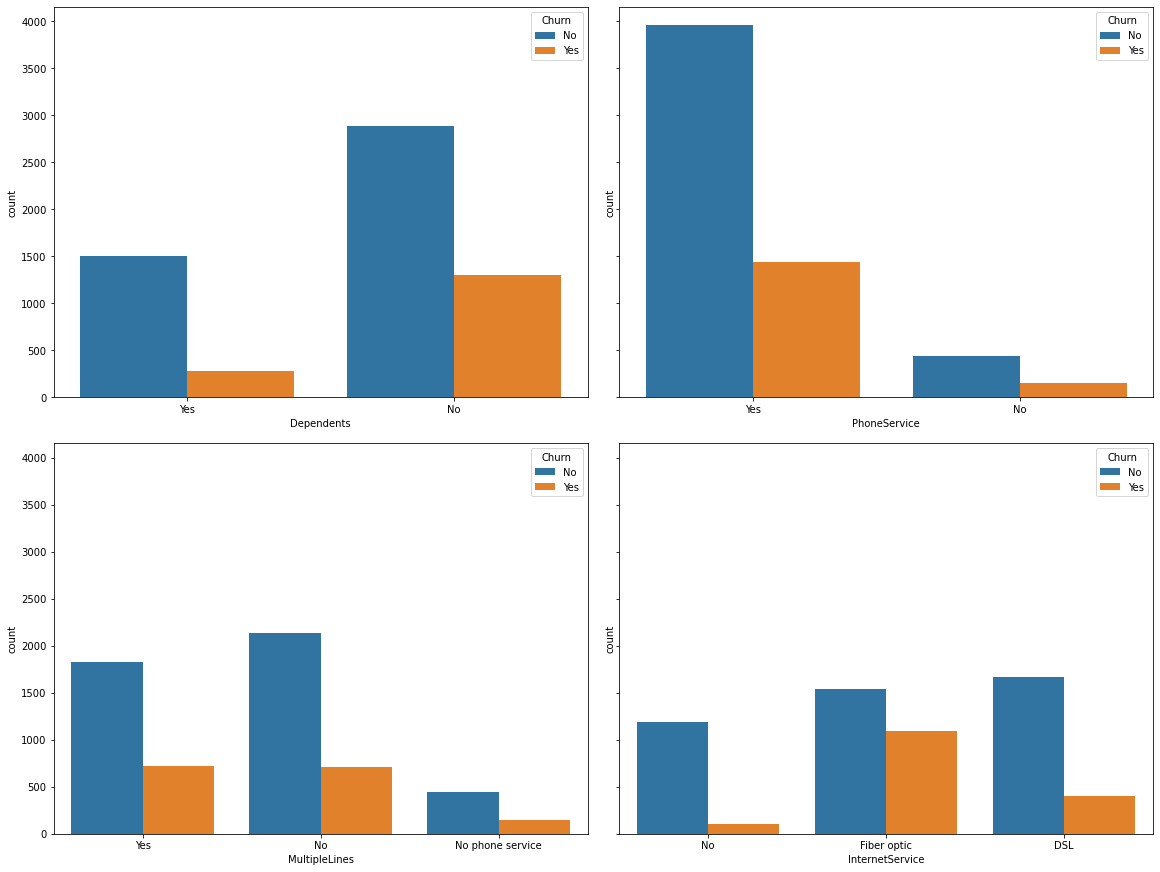

In [36]:
graphs = ['Dependents', 'PhoneService', 
          'MultipleLines', 'InternetService', ]

fig, ax = plt.subplots(2, 2, 
                       figsize=(16, 12), 
                       sharey=True,
                       constrained_layout=True,
                      )

for i, column in enumerate(graphs):
    #sns.histplot(x=telecom_users[column], ax=ax[i//3, i%3], kde=True)
    sns.countplot(x=column, hue='Churn',  data=telecom_users, ax=ax[i//2, i%2])

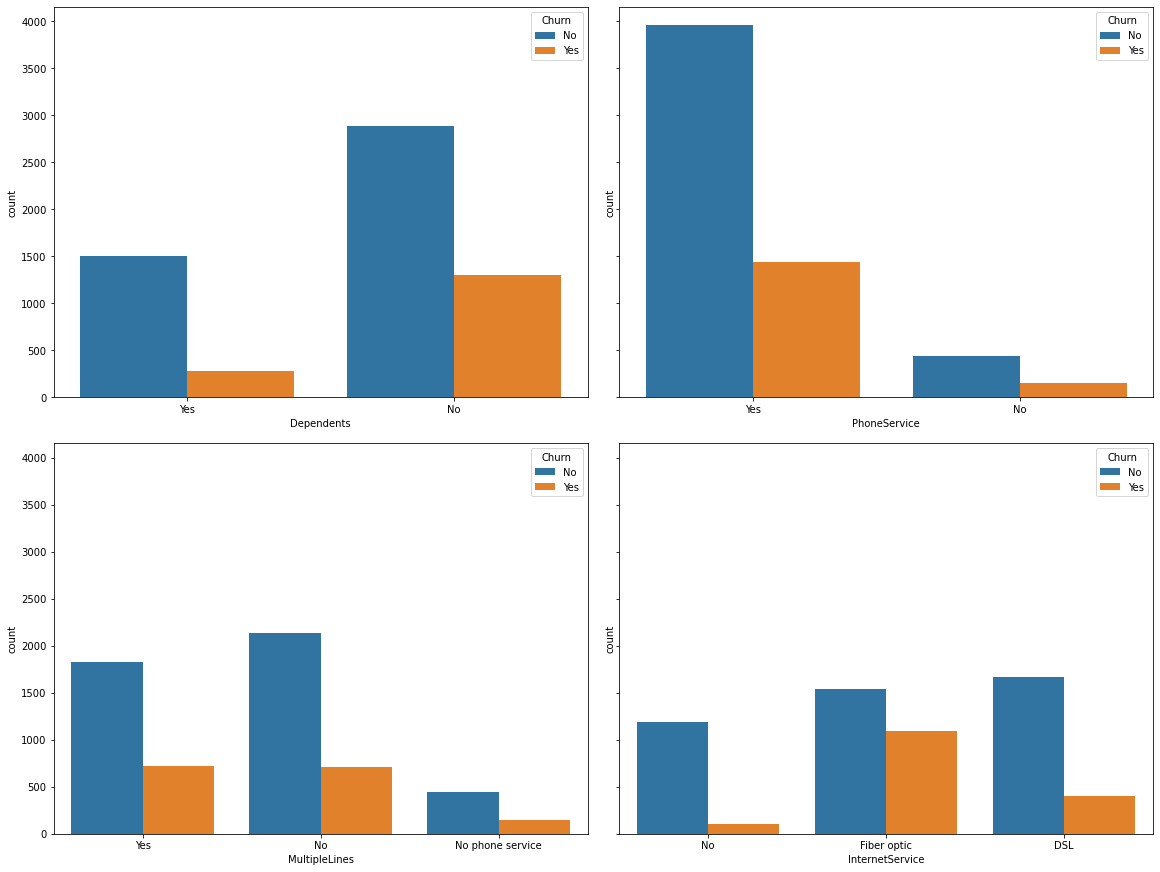

In [37]:
graphs = ['Dependents', 'PhoneService', 'MultipleLines', 'InternetService', ]

fig, ax = plt.subplots(2, 2, figsize=(16, 12), sharey=True, constrained_layout=True)

for i, column in enumerate(graphs):
    #sns.histplot(x=column, hue='Churn', data=telecom_users, ax=ax[i//2, i%2])
    sns.countplot(x=column, hue='Churn',  data=telecom_users, ax=ax[i//2, i%2])

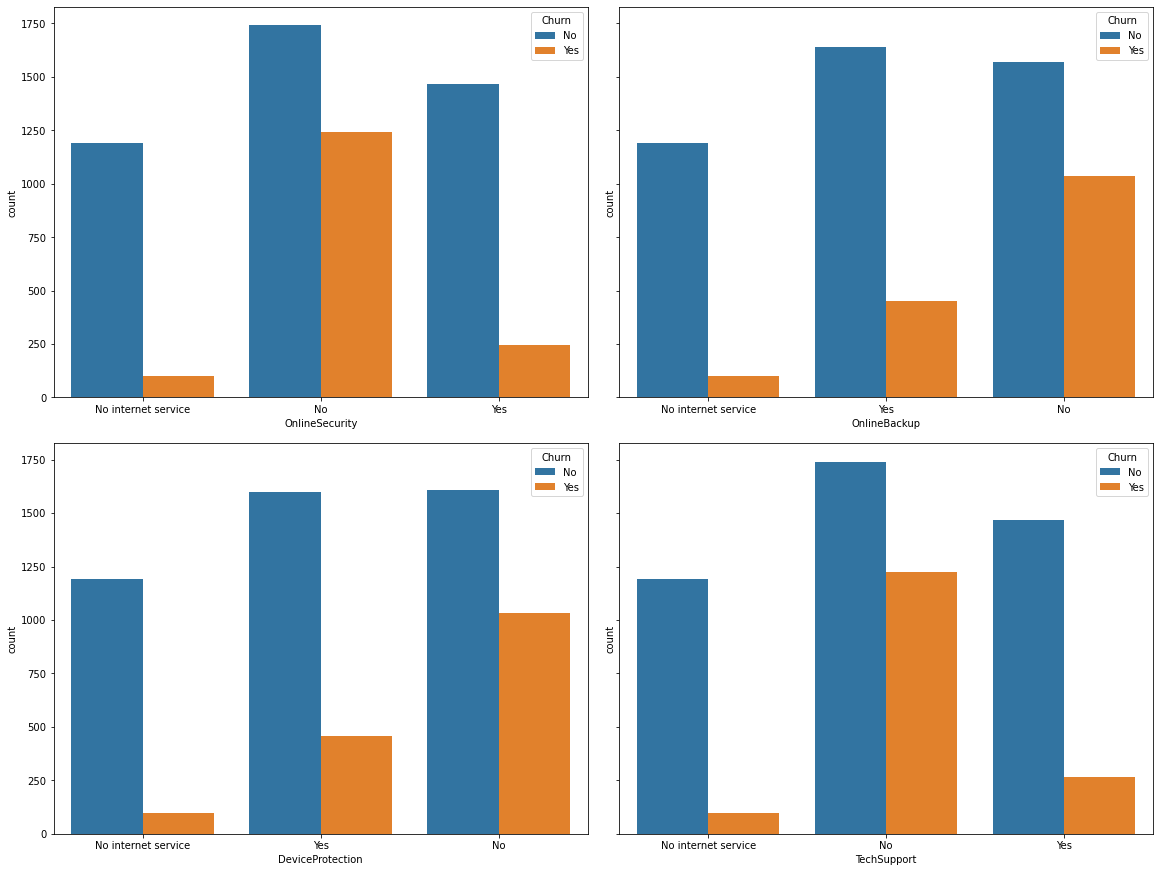

In [38]:
graphs = ['OnlineSecurity', 'OnlineBackup',
         'DeviceProtection', 'TechSupport', ]

fig, ax = plt.subplots(2, 2, figsize=(16, 12), sharey=True, constrained_layout=True)

for i, column in enumerate(graphs):
    #sns.histplot(x=telecom_users[column], ax=ax[i//3, i%3], kde=True)
    sns.countplot(x=column, hue='Churn',  data=telecom_users, ax=ax[i//2, i%2])

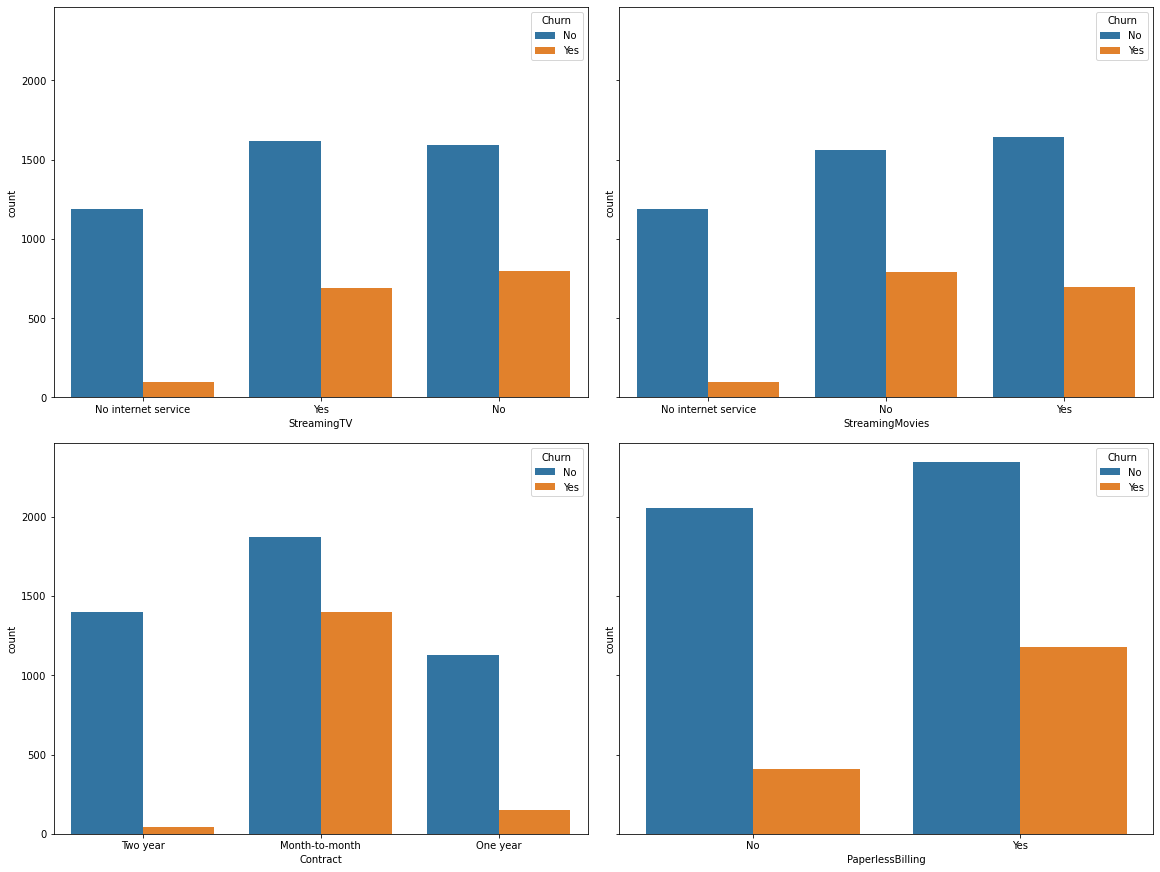

In [39]:
graphs = ['StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling'
         ]

fig, ax = plt.subplots(2, 2, figsize=(16, 12), sharey=True, constrained_layout=True)

for i, column in enumerate(graphs):
    #sns.histplot(x=telecom_users[column], ax=ax[i//3, i%3], kde=True)
    sns.countplot(x=column, hue='Churn',  data=telecom_users, ax=ax[i//2, i%2])

Text(0.5, 1.0, 'Разделение оттекших/оставшихся клиентов по методу оплаты')

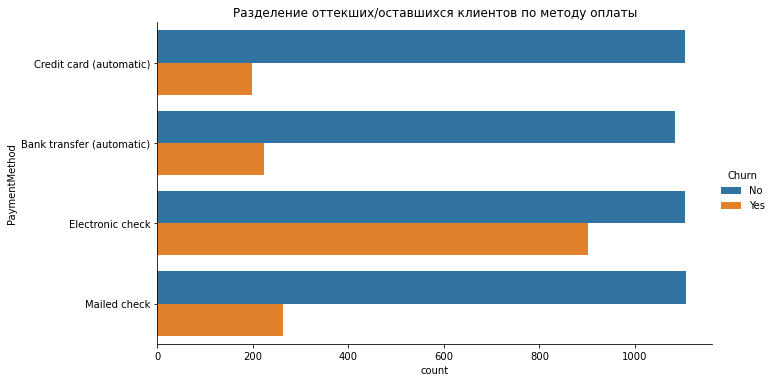

In [40]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.catplot(y='PaymentMethod', hue='Churn',  data=telecom_users, kind='count', height=5, aspect=2)
plt.title('Разделение оттекших/оставшихся клиентов по методу оплаты')

Наиболее активны в плане оттока клиенты, пользующеиеся методом оплаты "Electronic check"

# 3. Построение моделей для прогнозирования оттока

In [41]:
### YOUR CODE HERE ###

Для сравнения качества моделей просится метрика Accuracy, но данные не сбалансированы. Количество оттекших клиентов примерно в 4 hаза меньше чем оставшихся. К тому же, Accuracy довольно неудобная метрика для моделей. Потому возьмем ROC-AUC score.

In [42]:
# Здесь будем собирать скор, полученный разными моделями
model_score = pd.DataFrame(columns=['score', 'descr', 'estimator', 'accuracy'])

In [43]:
from sklearn import metrics

def plot_roc_auc(y_test, y_true, title='Receiver Operating Characteristic'):
    """Строит кривую ROC-AUC для y_test, y_true"""
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_true)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

In [44]:
def print_scores(y_test, y_true):
    print(f'precision_score = {precision_score(y_test, y_true):.6f},', 
          f'recall_score = {recall_score(y_test, y_true):.6f}')
    print(f'accuracy_score = {accuracy_score(y_test, y_true):.6f}')
    print()

In [45]:
telecom_users.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
# Список категориальных фичей в датасете
cat_features = ['gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

In [47]:
# Заменяю категории на числовые коды
# telecom_users[cat_features]=pd.factorize(telecom_users[cat_features])
for column in cat_features:
    telecom_users[column] = pd.factorize(telecom_users[column])[0]

# Заменяю класс предсказания Yes/No на цифровой, для удобства дальнейшей работы
telecom_users['Churn'][telecom_users['Churn']=='Yes']=1
telecom_users['Churn'][telecom_users['Churn']=='No']=0
telecom_users['Churn'] = telecom_users['Churn'].astype('int32')

<ipython-input-47-ee269a8270f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_users['Churn'][telecom_users['Churn']=='Yes']=1
<ipython-input-47-ee269a8270f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_users['Churn'][telecom_users['Churn']=='No']=0


In [48]:
# Разбиение на обучающую и валидационную выборки
X_full = telecom_users.drop(columns=['customerID', 'Churn'], axis=1)
y_full = telecom_users['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(
    X_full, 
    y_full, 
    test_size=0.3,
    stratify=y_full,
    random_state=110,
)

In [49]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4282,1,0,0,0,59,0,1,2,1,1,2,2,1,2,0,1,0,75.95,4542.35
3409,1,0,1,1,3,0,1,2,1,2,2,1,1,1,1,1,2,54.20,140.40
3068,0,0,0,1,10,0,0,1,1,2,2,1,2,2,1,1,2,85.25,855.30
779,0,0,0,0,30,0,1,1,1,1,1,1,2,1,1,0,1,82.05,2570.20
1303,0,0,1,1,8,0,0,1,1,2,2,1,2,2,1,1,2,86.55,649.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,1,0,1,1,1,1,2,2,1,2,1,2,2,1,1,0,3,35.90,35.90
3198,0,1,0,1,35,0,0,1,1,2,1,1,2,1,2,1,1,81.60,2815.25
1788,0,0,0,1,6,0,1,1,1,1,1,1,2,2,1,1,2,91.00,531.00
5576,0,0,0,1,3,1,2,2,1,2,2,2,2,1,1,1,2,29.90,92.25


In [50]:
y_train

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

/opt/conda/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Contract', 'Dependents', 'DeviceProtection', 'InternetService', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/opt/conda/lib/python3.8/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.8/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is o

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.846164	valid_0's binary_logloss: 0.445107
[200]	valid_0's auc: 0.847396	valid_0's binary_logloss: 0.4196
[300]	valid_0's auc: 0.847174	valid_0's binary_logloss: 0.414656
Early stopping, best iteration is:
[246]	valid_0's auc: 0.848108	valid_0's binary_logloss: 0.415974

Test AUC LightGBM is 0.848108

CPU times: user 1.95 s, sys: 47.1 ms, total: 2 s
Wall time: 550 ms


<AxesSubplot:title={'center':'Feature importance by LightGBM'}, xlabel='Feature importance', ylabel='Features'>

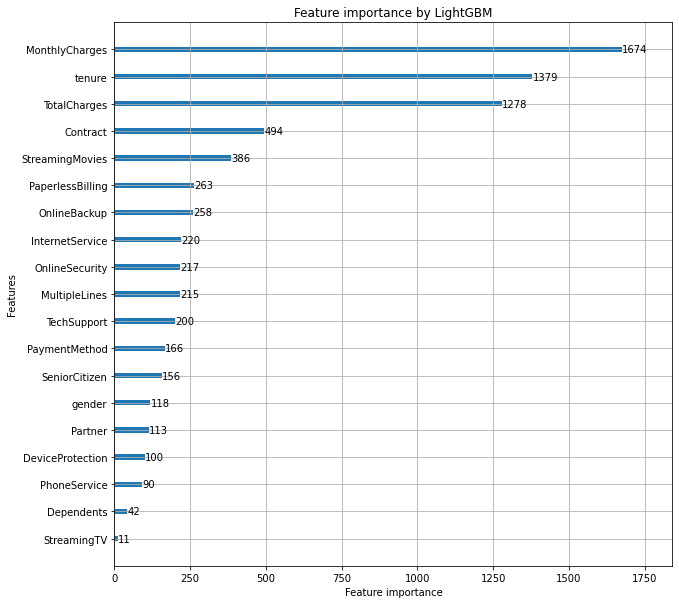

In [51]:
%%time
# LightGBM

model_lgb = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=8,
    n_jobs=-1,
    random_state=43
)

model_lgb.fit(
    X_train, y_train, 
    eval_set=(X_test, y_test), 
    categorical_feature=cat_features,
    eval_metric='AUC',
    early_stopping_rounds=100,
    verbose=100,
)
pred_lgb = model_lgb.predict_proba(X_test)[:,1]

pred_lgb_score = roc_auc_score(y_test, pred_lgb)
pred_lgb_accuracy = accuracy_score(y_test, model_lgb.predict(X_test))

model_score.loc['model_lgb'] = [pred_lgb_score, 'LightGBM', model_lgb, pred_lgb_accuracy]

print(f'\nTest AUC LightGBM is {pred_lgb_score:.6f}\n')
 
# Save model to disk
pickle.dump(model_lgb, open('data/sa-model_lgb.pkl', "wb"))

# Plot LightGBM features importance
fig, ax = plt.subplots(1,1,figsize=(10, 10))
lgb.plot_importance(booster=model_lgb, ax=ax, title='Feature importance by LightGBM');

Learning rate set to 0.045144


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8118849	best: 0.8118849 (0)	total: 56ms	remaining: 55.9s
100:	test: 0.8534576	best: 0.8535022 (98)	total: 705ms	remaining: 6.27s
200:	test: 0.8543322	best: 0.8547651 (145)	total: 1.4s	remaining: 5.56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8547650879
bestIteration = 145

Shrink model to first 146 iterations.

Test AUC for CatBoost is 0.854765



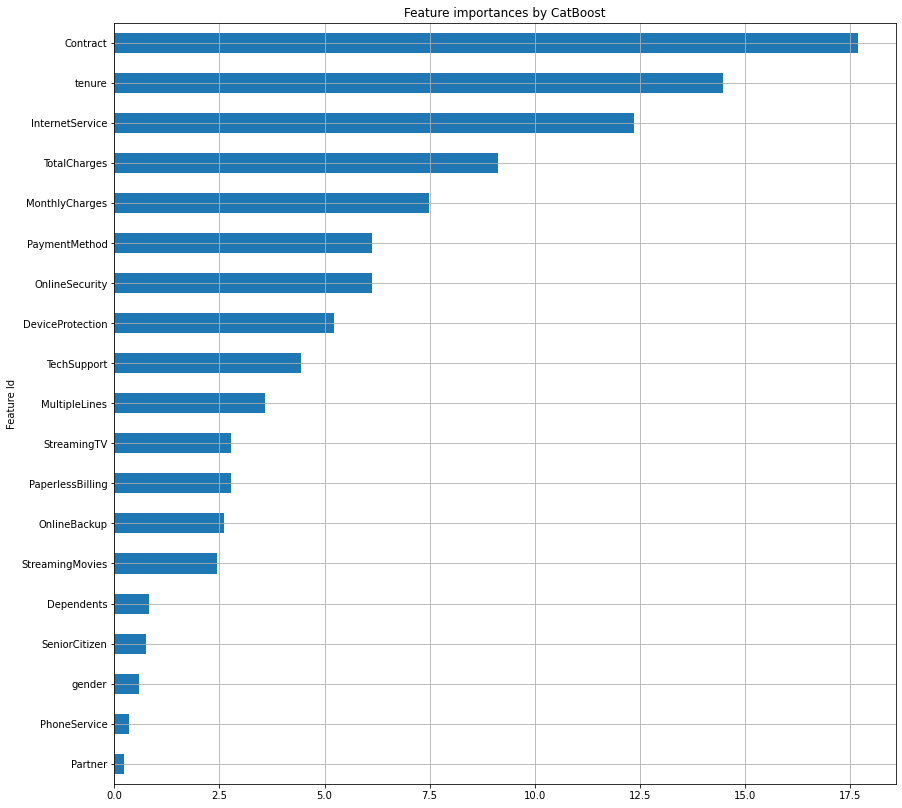


precision_score = 0.676166, recall_score = 0.548319
accuracy_score = 0.810690



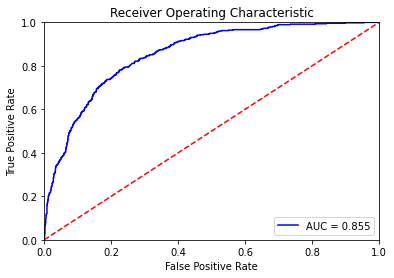

In [52]:
# CatBoost

model_cb = cb.CatBoostClassifier(
        iterations=1000,
        depth=6,
        eval_metric='AUC',
        cat_features=cat_features,
        random_state=47,
        task_type='CPU',
    )

model_cb.fit(
    X=X_train, 
    y=y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=100,
    plot=True,
    verbose=100,
)

pred_cb = model_cb.predict_proba(X_test)[:,1]

pred_cb_score = roc_auc_score(y_test, pred_cb)
pred_cb_accuracy = accuracy_score(y_test, model_cb.predict(X_test))

model_score.loc['model_cb'] = [pred_cb_score, 'CatBoost', model_cb, pred_cb_accuracy]

print(f'\nTest AUC for CatBoost is {pred_cb_score:.6f}\n')

# Save model to disk
pickle.dump(model_cb, open('data/sa-model_cb.pkl', "wb"))

# Plot CatBoost features importance
f_importance = model_cb.get_feature_importance(prettified=True)
f_importance[f_importance['Importances']>0].sort_values(by='Importances', ascending=True).set_index('Feature Id').plot(
    kind='barh', figsize=(14,14), legend=False, grid=True, title="Feature importances by CatBoost");
plt.show()

print()
print_scores(y_test, model_cb.predict(X_test))
plot_roc_auc(y_test, pred_cb)

In [53]:
%%time

model_mlp = make_pipeline(
    MinMaxScaler(),
    MLPClassifier(
        random_state=47, 
        verbose=False,
        early_stopping=True,
        n_iter_no_change=5,
        solver='adam',
        hidden_layer_sizes=(200, 100),
#         hidden_layer_sizes=(300, 200 ,100), alpha=0.03, learning_rate='adaptive', learning_rate_init=0.0005, 
#         max_iter=200, momentum=0.9, nesterovs_momentum=True,
    ),
    verbose=True,
)
model_mlp.fit(X_train, y_train)
pred_mlp = model_mlp.predict_proba(X_test)[:,1]
train_mlp = model_mlp.predict_proba(X_train)[:,1]

pred_mlp_score = roc_auc_score(y_test, pred_mlp)
pred_mlp_accuracy = accuracy_score(y_test, model_mlp.predict(X_test))

model_score.loc['model_mlp'] = [pred_mlp_score, 'MLP', model_mlp, pred_mlp_accuracy]

print(f'\nTrain AUC for MLPClassifier is {roc_auc_score(y_train, train_mlp):.6f}')
print(f'Test AUC for MLPClassifier is {pred_mlp_score:.6f}\n')

pickle.dump(model_mlp, open('data/sa-model_mlp.pkl', "wb"))

[Pipeline] ...... (step 1 of 2) Processing minmaxscaler, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing mlpclassifier, total=   0.5s

Train AUC for MLPClassifier is 0.831897
Test AUC for MLPClassifier is 0.840555

CPU times: user 1.37 s, sys: 732 ms, total: 2.1 s
Wall time: 568 ms


In [54]:
%%time
# KNeighborsRegressor

model_knr =  make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(algorithm='auto', leaf_size=13, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
          weights='uniform')
)
model_knr.fit(X_train, y_train)

print('Model fitting done')
pred_knr = model_knr.predict_proba(X_test)[:,1]

pred_knr_score = roc_auc_score(y_test, pred_knr)
pred_knr_accuracy = accuracy_score(y_test, model_knr.predict(X_test))

model_score.loc['model_knr'] = [pred_knr_score, 'KNeighbors', model_knr, pred_knr_accuracy]

print(f'\nTest AUC for KNeighborsClassifier is {pred_knr_score:.6f}\n')

pickle.dump(model_knr, open('data/sa-model_knr.pkl', "wb"))

Model fitting done

Test AUC for KNeighborsClassifier is 0.788437

CPU times: user 594 ms, sys: 116 ms, total: 709 ms
Wall time: 249 ms


In [55]:
%%time
# Naive Bayes

model_nb = make_pipeline(
    ColumnTransformer([
         ('cat_features', OneHotEncoder(), cat_features),
        ], remainder='passthrough', n_jobs=-1, 
        sparse_threshold=0.3,
        verbose=True),
    MaxAbsScaler(),
    GaussianNB(),
    verbose=True,
)
model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict_proba(X_test)[:,1]
train_nb = model_nb.predict_proba(X_train)[:,1]

pred_nb_score = roc_auc_score(y_test, pred_nb)
pred_nb_accuracy = accuracy_score(y_test, model_nb.predict(X_test))

model_score.loc['model_nb'] = [pred_nb_score, 'Naive Bayes', model_nb, pred_nb_accuracy]

print(f'\nTrain AUC for GaussianNB is {roc_auc_score(y_train, train_nb):.6f}')
print(f'Test  AUC for GaussianNB is {pred_nb_score:.6f}\n')

pickle.dump(model_nb, open('data/sa-model_nb.pkl', "wb"))

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   0.8s
[Pipeline] ...... (step 2 of 3) Processing maxabsscaler, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing gaussiannb, total=   0.0s

Train AUC for GaussianNB is 0.809882
Test  AUC for GaussianNB is 0.825252

CPU times: user 77 ms, sys: 43.5 ms, total: 121 ms
Wall time: 1.38 s


In [56]:

%%time
# SGDClassifier

from sklearn.linear_model import SGDClassifier

model_sgd = make_pipeline(
    ColumnTransformer([
         ('cat_features', OneHotEncoder(), cat_features),
        ], remainder='passthrough', n_jobs=-1, 
        sparse_threshold=0.3,
        verbose=True),
    MaxAbsScaler(),
    SGDClassifier(
        loss='log',
        random_state=43,
        n_jobs=-1,
    ),
    verbose=True,
)
model_sgd.fit(X_train, y_train)
pred_sgd = model_sgd.predict_proba(X_test)[:,1]
train_sgd = model_sgd.predict_proba(X_train)[:,1]

pred_sgd_score = roc_auc_score(y_test, pred_sgd)
pred_sgd_accuracy = accuracy_score(y_test, model_sgd.predict(X_test))

model_score.loc['model_sgd'] = [pred_sgd_score, 'SGDClassifier', model_sgd, pred_sgd_accuracy]

print(f'\nTrain AUC for SGDClassifier is {roc_auc_score(y_train, train_sgd):.6f}')
print(f'Test  AUC for SGDClassifier is {pred_sgd_score:.6f}\n')

pickle.dump(model_sgd, open('data/sa-model_sgd.pkl', "wb"))

[Pipeline] . (step 1 of 3) Processing columntransformer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing maxabsscaler, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing sgdclassifier, total=   0.1s

Train AUC for SGDClassifier is 0.833249
Test  AUC for SGDClassifier is 0.839797

CPU times: user 143 ms, sys: 52.4 ms, total: 195 ms
Wall time: 120 ms


# 4. Сравнение качества моделей 

In [57]:
### YOUR CODE HERE ###

In [58]:
# Сортированный скор моделей
model_score.sort_values('score', ascending=False, inplace=True)
model_score[['score', 'descr', 'accuracy']]

,score,descr,accuracy
model_cb,0.854765,CatBoost,0.810690
model_lgb,0.848108,LightGBM,0.804009
model_mlp,0.840555,MLP,0.798441
model_sgd,0.839797,SGDClassifier,0.793987
model_nb,0.825252,Naive Bayes,0.706013
model_knr,0.788437,KNeighbors,0.772829


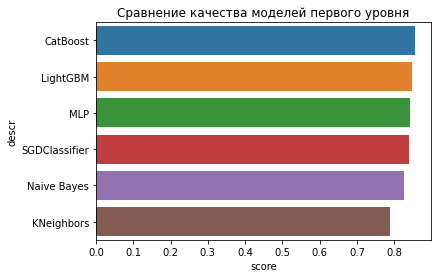

In [59]:
ax = sns.barplot(x='score', y='descr', data=model_score)
plt.title('Сравнение качества моделей первого уровня');
# plt.show(ax)

Теперь построим ансамбль моделей

In [60]:
# Матрица предсказаний для тренировочной части данных модели второго уровня
X_train_level2 = np.c_[
    model_cb.predict(X_train),
    model_lgb.predict(X_train),
    model_sgd.predict(X_train),
    model_mlp.predict(X_train),
    model_nb.predict(X_train),
    model_knr.predict(X_train),
]

In [61]:
# Матрица предсказаний для тестовых данных модели второго уровня
X_test_level2 = np.c_[
    model_cb.predict(X_test),
    model_lgb.predict(X_test),
    model_sgd.predict(X_test),
    model_mlp.predict(X_test),
    model_nb.predict(X_test),
    model_knr.predict(X_test),
]


Train AUC for GaussianNB L2 is 0.824508
Test AUC for GaussianNB L2 is 0.815790
Test Accuracy for GaussianNB L2 is 0.806793



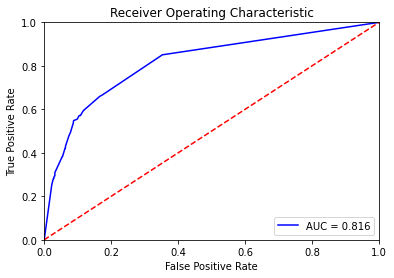

In [62]:
# Выбираю относительно простой классификатор
l2_model_en = GaussianNB()
l2_model_en.fit(X_train_level2, y_train)
test_l2_en = l2_model_en.predict_proba(X_test_level2)[:,1]
train_l2_en = l2_model_en.predict_proba(X_train_level2)[:,1]
# pred_sgd_accuracy = accuracy_score(y_test, model_sgd.predict(X_test))

print(f'\nTrain AUC for GaussianNB L2 is {roc_auc_score(y_train, train_l2_en):.6f}')
print(f'Test AUC for GaussianNB L2 is {roc_auc_score(y_test, test_l2_en):.6f}')
print(f'Test Accuracy for GaussianNB L2 is {accuracy_score(y_test, l2_model_en.predict(X_test_level2)):.6f}\n')

plot_roc_auc(y_test, test_l2_en)

Модель втрого уровня дала скор хуже, чем большинство моделей первого уровня. Похоже, идея обучить классификатор на уже предсказанных значениях, при условии оптимизации auc, а не accuracy - не лучшая идея. Попробуем обучить очень простой классификатор на вероятностях

In [63]:
# Готовлю список классификаторов для алгоритмов ниже
estimators = []
for estimator in model_score.iterrows():
    estimators.append((estimator[0], estimator[1][2]))


Train AUC for VotingClassifier L2 is 0.887434
Test AUC for VotingClassifier L2 is 0.847171

precision_score = 0.640523, recall_score = 0.617647
accuracy_score = 0.806793



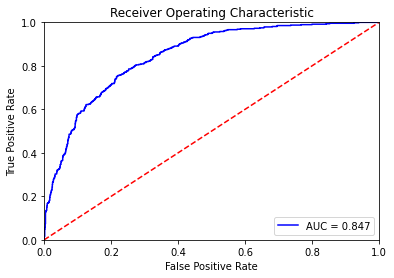

CPU times: user 2.72 s, sys: 999 ms, total: 3.72 s
Wall time: 8.67 s


In [64]:
%%time
# VotingClassifier 'soft' mode

l2_model_vcs = VotingClassifier(
    estimators=estimators, 
    voting='soft',
    n_jobs=-1,
    verbose=False,
)
# l2_model_vc.fit(X_train_level2, y_train)
l2_model_vcs.fit(X_train, y_train)
test_l2_vcs = l2_model_vcs.predict_proba(X_test)[:,1]
train_l2_vcs = l2_model_vcs.predict_proba(X_train)[:,1]

print(f'\nTrain AUC for VotingClassifier L2 is {roc_auc_score(y_train, train_l2_vcs):.6f}')
print(f'Test AUC for VotingClassifier L2 is {roc_auc_score(y_test, test_l2_vcs):.6f}\n')

print_scores(y_test, l2_model_vcs.predict(X_test))
plot_roc_auc(y_test, test_l2_vcs)

Результат, как и ожидается от стэкинга, не лучше максимального, но хорош. Хотелось бы провалидировать его на закрытой тестовой выборке

precision_score = 0.698830, recall_score = 0.502101
accuracy_score = 0.810690



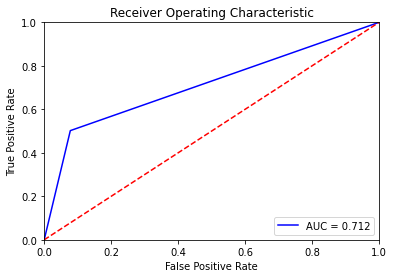

CPU times: user 1.03 s, sys: 504 ms, total: 1.53 s
Wall time: 7.98 s


In [65]:
%%time
# VotingClassifier 'hard' mode

l2_model_vch = VotingClassifier(
    estimators=estimators, 
    voting='hard',
    n_jobs=-1,
    verbose=False,
)
# l2_model_vc.fit(X_train_level2, y_train)
l2_model_vch.fit(X_train, y_train)
test_l2_vch = l2_model_vch.predict(X_test)
# train_l2_vch = l2_model_vch.predict(X_train)

# print(f'\nTrain AUC for VotingClassifier L2 is {roc_auc_score(y_train, train_l2_vc):.6f}')
# print(f'Test AUC for VotingClassifier L2 is {roc_auc_score(y_test, test_l2_vc):.6f}')
#print(f'Test Accuracy for VotingClassifier L2 is {accuracy_score(y_test, l2_model_vch.predict(X_test)):.6f}\n')
print_scores(y_test, test_l2_vch)
plot_roc_auc(y_test, test_l2_vch)

Отбросив вероятности, потеряли в полноте, но точность и доля правильных ответов выше